In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)


In [4]:
#b i - reading from the dataset
data = pd.read_csv('dataset.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data['diagnosis'] = data['diagnosis'].map({'M':0,'B':1})
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractional
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
#b ii - splitting the data to train and test data
X = data.iloc[:,2:].values
Y = data.iloc[:,1].values
y_true = Y[:, np.newaxis]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(X)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [100]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [101]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (426, 30)
Shape y_train: (426, 1))
Shape X_test: (143, 30)
Shape y_test: (143, 1)


In [102]:
#b iii
#Initialising learning rate, epochs
class Perceptron(object):
    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
#initialising weights, delta_w is the weight vector       
    def fit(self,X,y):
        self.weights = np.zeros(1+X.shape[1])
        self.errors = []
        for i in range(self.epochs):
            error = 0
            for xi, output in zip(X, Y):
                delta_w = self.learning_rate * (output - self.predict(xi))
                self.weights[1:] += delta_w * xi
                self.weights[0] += delta_w
                error += int(delta_w != 0.0)
            self.errors.append(error)
        return self.weights
    
    def inputs(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    #b iv - activation function
    def predict(self, X):
        return np.where(self.inputs(X) >= 0.0, 1, 0)

   


In [103]:
perceptron = Perceptron(0.05,400)
#b v-training the model
trained_weights = perceptron.fit(X_train,y_train)


In [104]:
#b vi - printing the weights and the hyper parameters
print("Learned weights \n: ",trained_weights)
print("\nLearning rate : ",perceptron.learning_rate)
print("\nEpochs : ",perceptron.epochs)

Learned weights 
:  [ 9.85000000e+00  1.77823950e+02 -4.45546500e+02  5.80089500e+02
 -9.49800000e+01 -3.41222500e-01 -1.69477410e+01 -1.80544925e+01
 -7.57011095e+00 -9.24483000e+00 -2.27689550e+00 -9.51410000e+00
  1.05138470e+02 -1.33541405e+02 -2.31561050e+02 -1.16356350e-01
 -7.11098030e+00 -1.00844329e+01 -1.84174335e+00 -1.23140330e+00
 -1.10202599e+00 -1.10070000e+00  2.95475000e+01 -9.98960000e+01
  1.25130000e+02 -1.80235100e+00 -4.60102605e+01 -4.81727376e+01
 -1.96996793e+01 -1.31121000e+01 -6.52480400e+00]

Learning rate :  0.05

Epochs :  400


In [105]:
#b vii - predicting the outputs of train and test data
y_predicted_train = perceptron.predict(X_train)
y_predicted_test = perceptron.predict(X_test)

print(y_predicted_train)
print("Training accuracy: ",100 - np.mean(np.abs(y_predicted_train - y_train)) * 100," %")
print("Testing accuracy: ",100 - np.mean(np.abs(y_predicted_test - y_test)) * 100," %")


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Training accuracy:  62.91079812206573  %
Testing accuracy:  62.23776223776224  %


[[ 0 54]
 [ 0 89]]


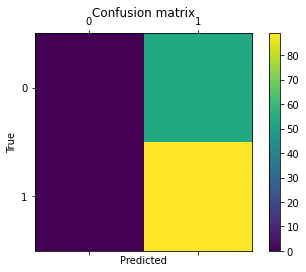

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix_grid = confusion_matrix(y_test, y_predicted_test)
print(confusion_matrix_grid)
figure = plt.figure()
a = figure.add_subplot(111)
b = a.matshow(confusion_matrix_grid)
plt.title('Confusion matrix')
figure.colorbar(b)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#Visualisation
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs[Number of iterations through the dataset]')
plt.ylabel('Number of misclassifications')
plt.show()